# Trajectories from ERDDAP

In [1]:
import pandas as pd
import EcoFOCIpy.io.erddap as erddapy
from erddapy import ERDDAP

In [2]:
import pygmt

# and setup the plot boundaries given the region
extent=[-170, -166, 62, 67] #NBering-Arctic

grid = pygmt.datasets.load_earth_relief(resolution="05m", region=extent) #datasets here can be found in the documentation... many are SRTM derived at high res and will be downloaded to start

In [3]:
status_dic = {'final':{'url':"http://ecofoci-field.pmel.noaa.gov:8080/erddap",'filename':'.csv','dataset':'datasets_sg402_Nome_1m_upanddown'},
              }

In [4]:
### do all moorings

status = 'final'
e = ERDDAP(server=status_dic[status]['url'])
df_ds = pd.read_csv(e.get_search_url(response='csv', search_for=f'{status_dic[status]["dataset"]}'))

for dataset_id in df_ds['Dataset ID']:
    print(dataset_id)
    e = ERDDAP(server=status_dic[status]['url'],
              protocol='tabledap',
              response='csv')

    e.dataset_id=dataset_id
    
    pdf = e.to_pandas(
                index_col='time (UTC)',
                parse_dates=True,
                skiprows=(1,),  # units information can be dropped.
                low_memory=False
            )
    pdf.columns = [x.split(' ')[0] for x in pdf.columns]
    pdf.index.name = 'time'


datasets_sg402_Nome_1m_upanddown


In [5]:
pdf = pdf.loc[pdf.index.dropna()]

In [6]:
sfc_pdf = pdf.groupby('profile_id').head(1)

grdcontour [WARNING]: No contours found


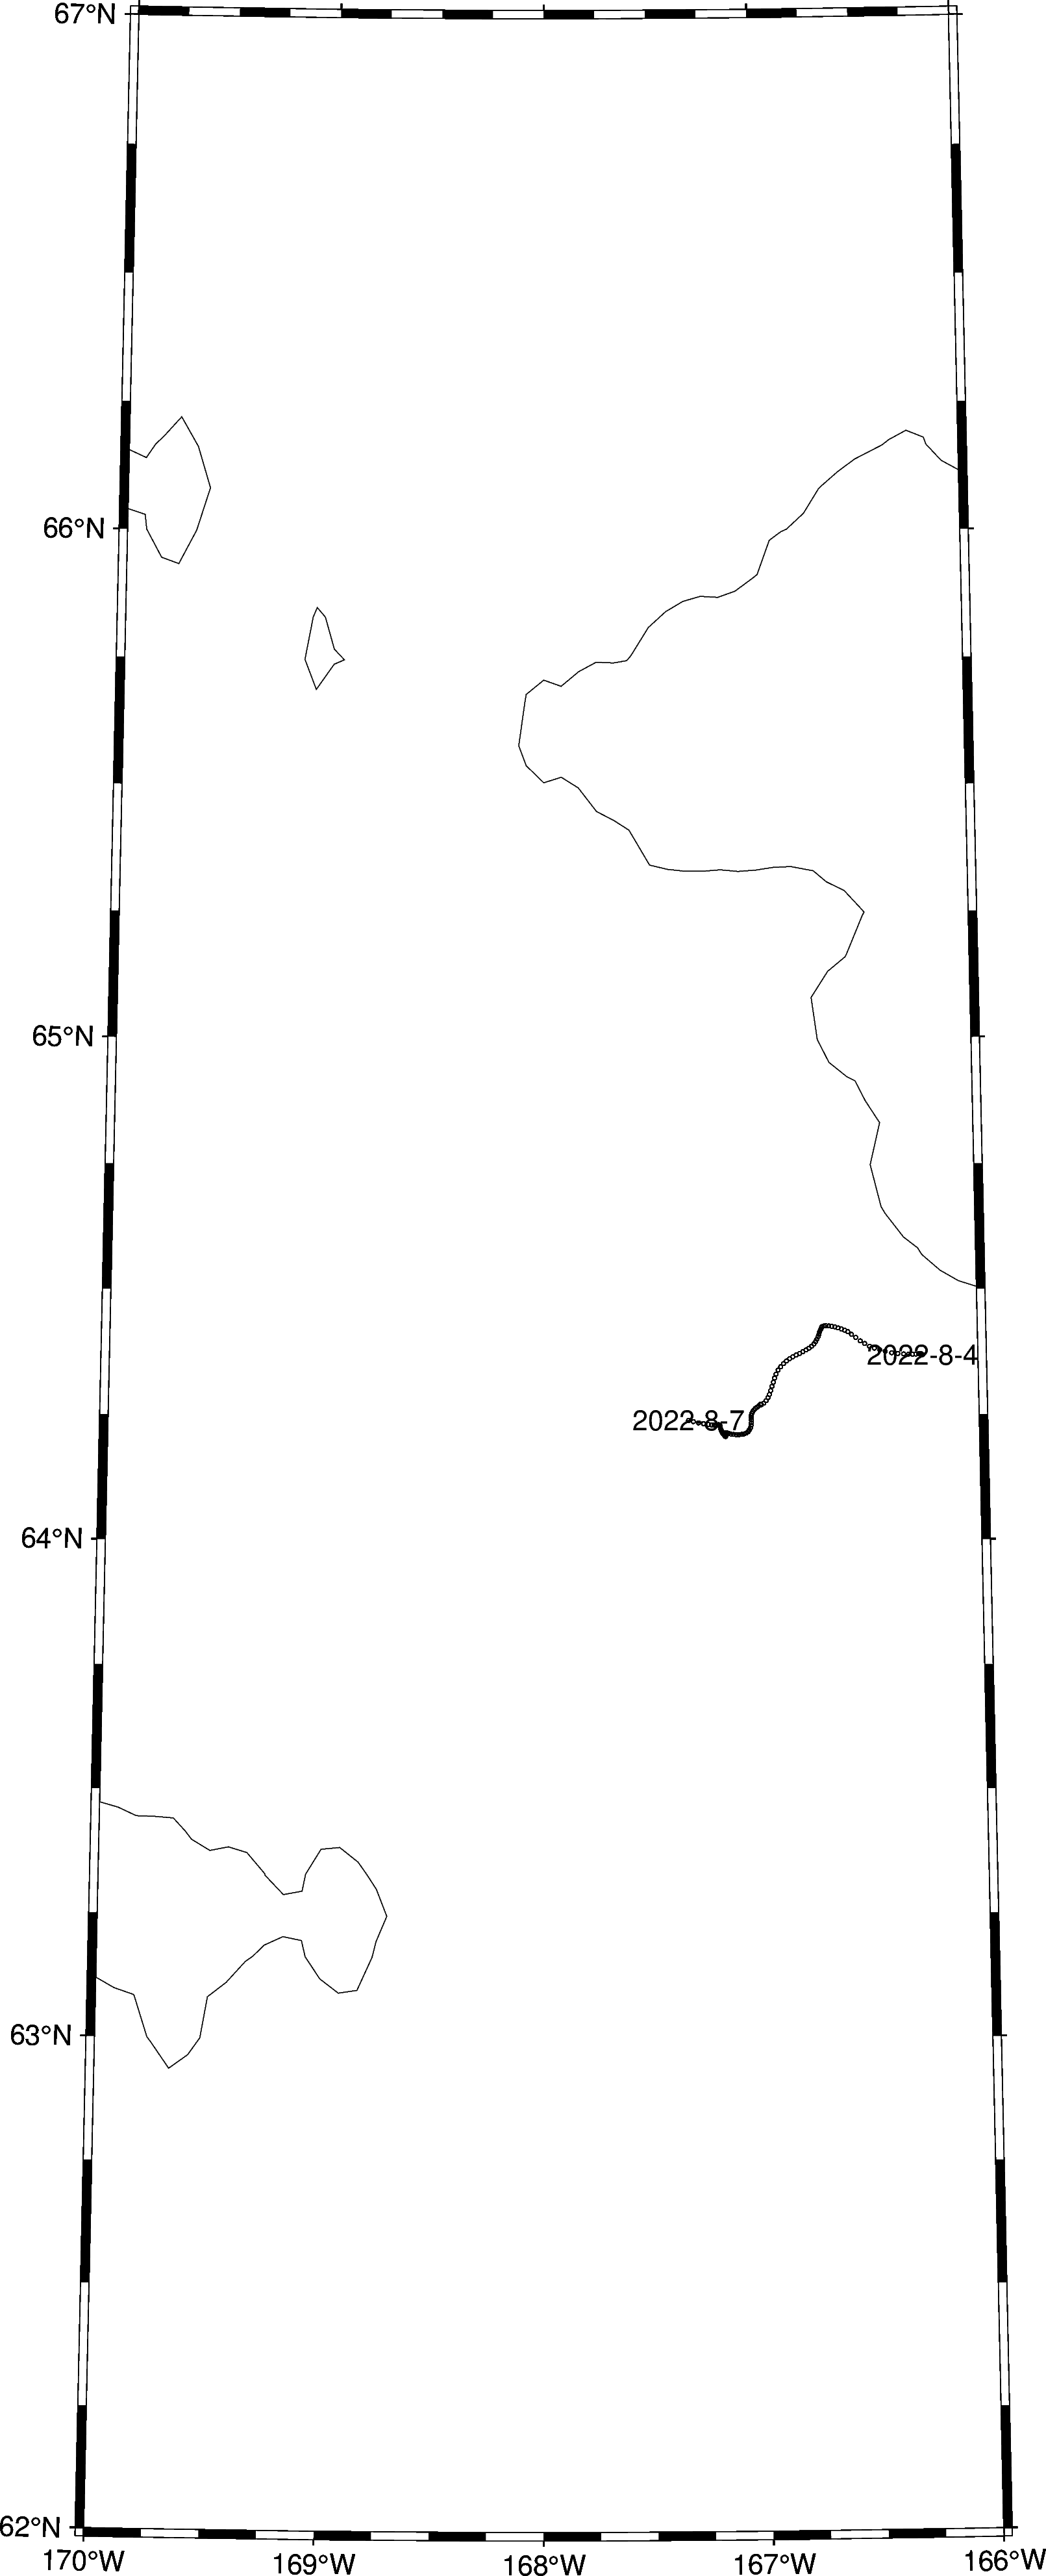

grdcontour [WARNING]: No contours found


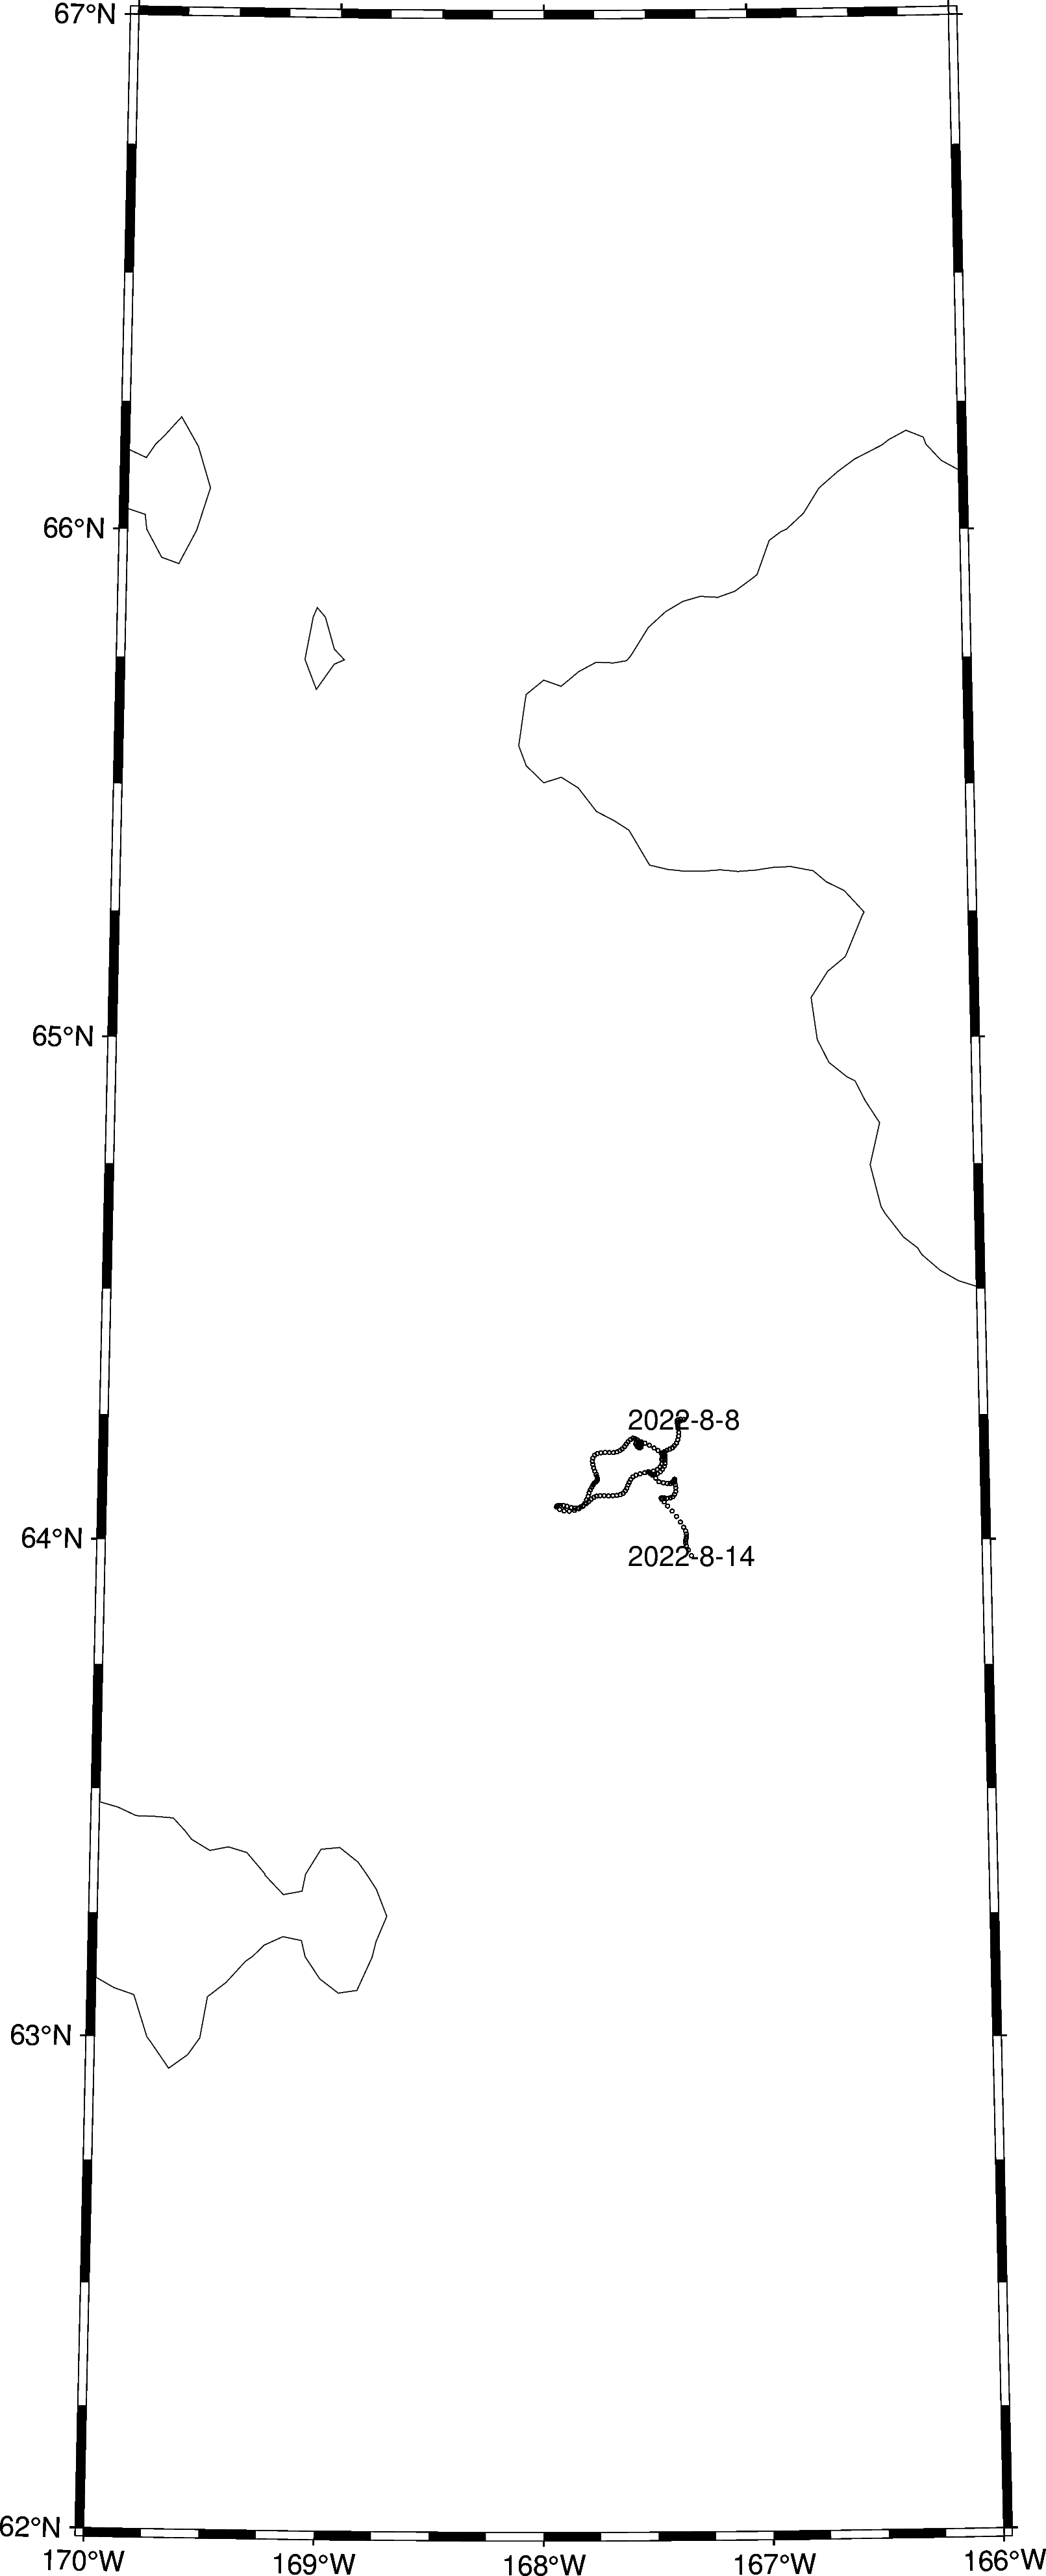

grdcontour [WARNING]: No contours found


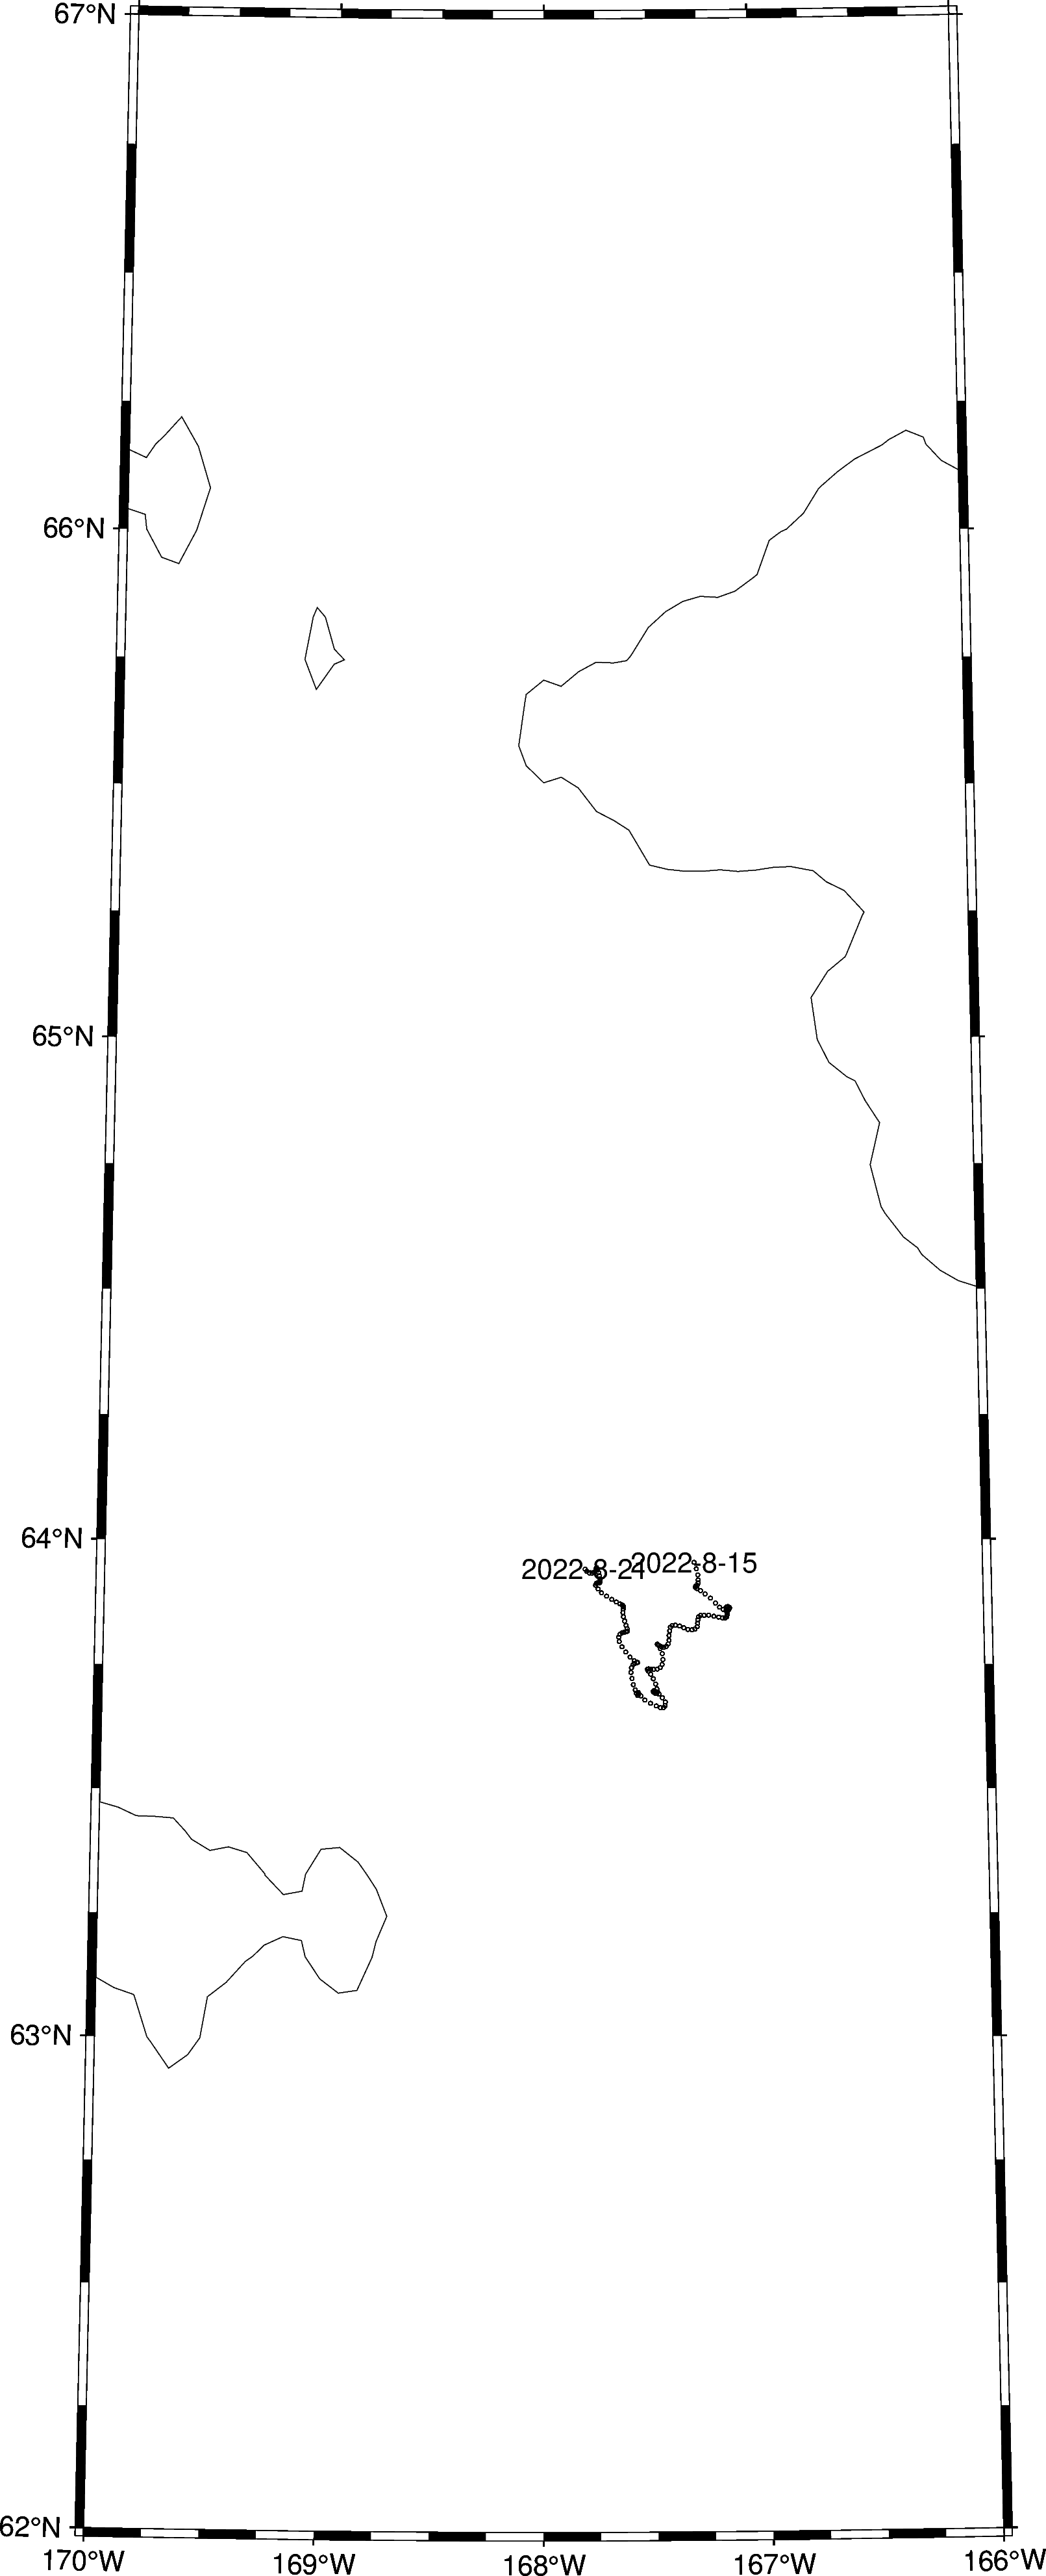

grdcontour [WARNING]: No contours found


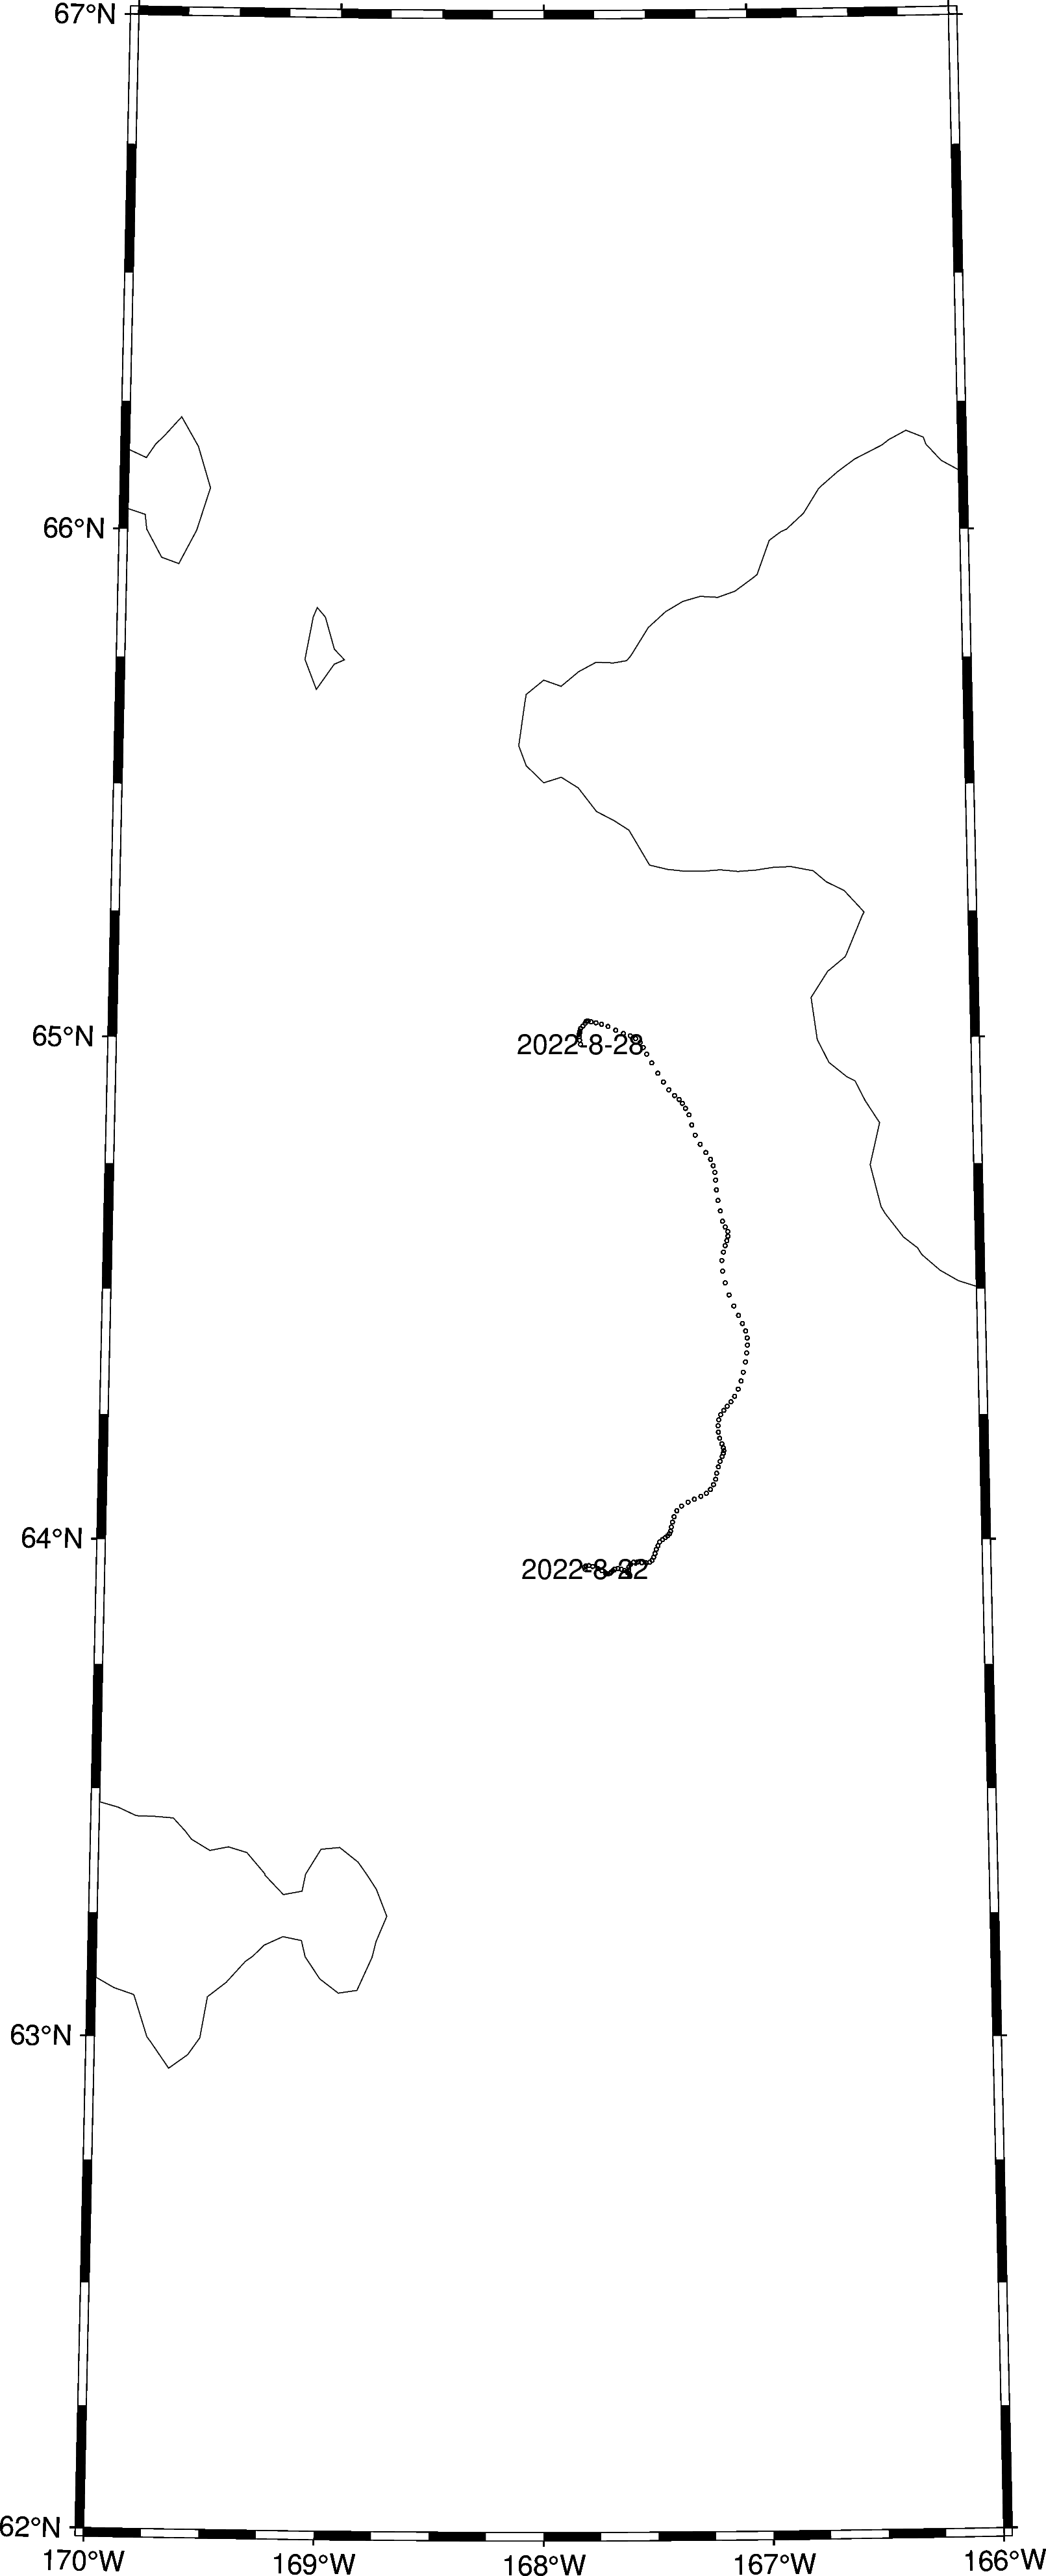

grdcontour [WARNING]: No contours found


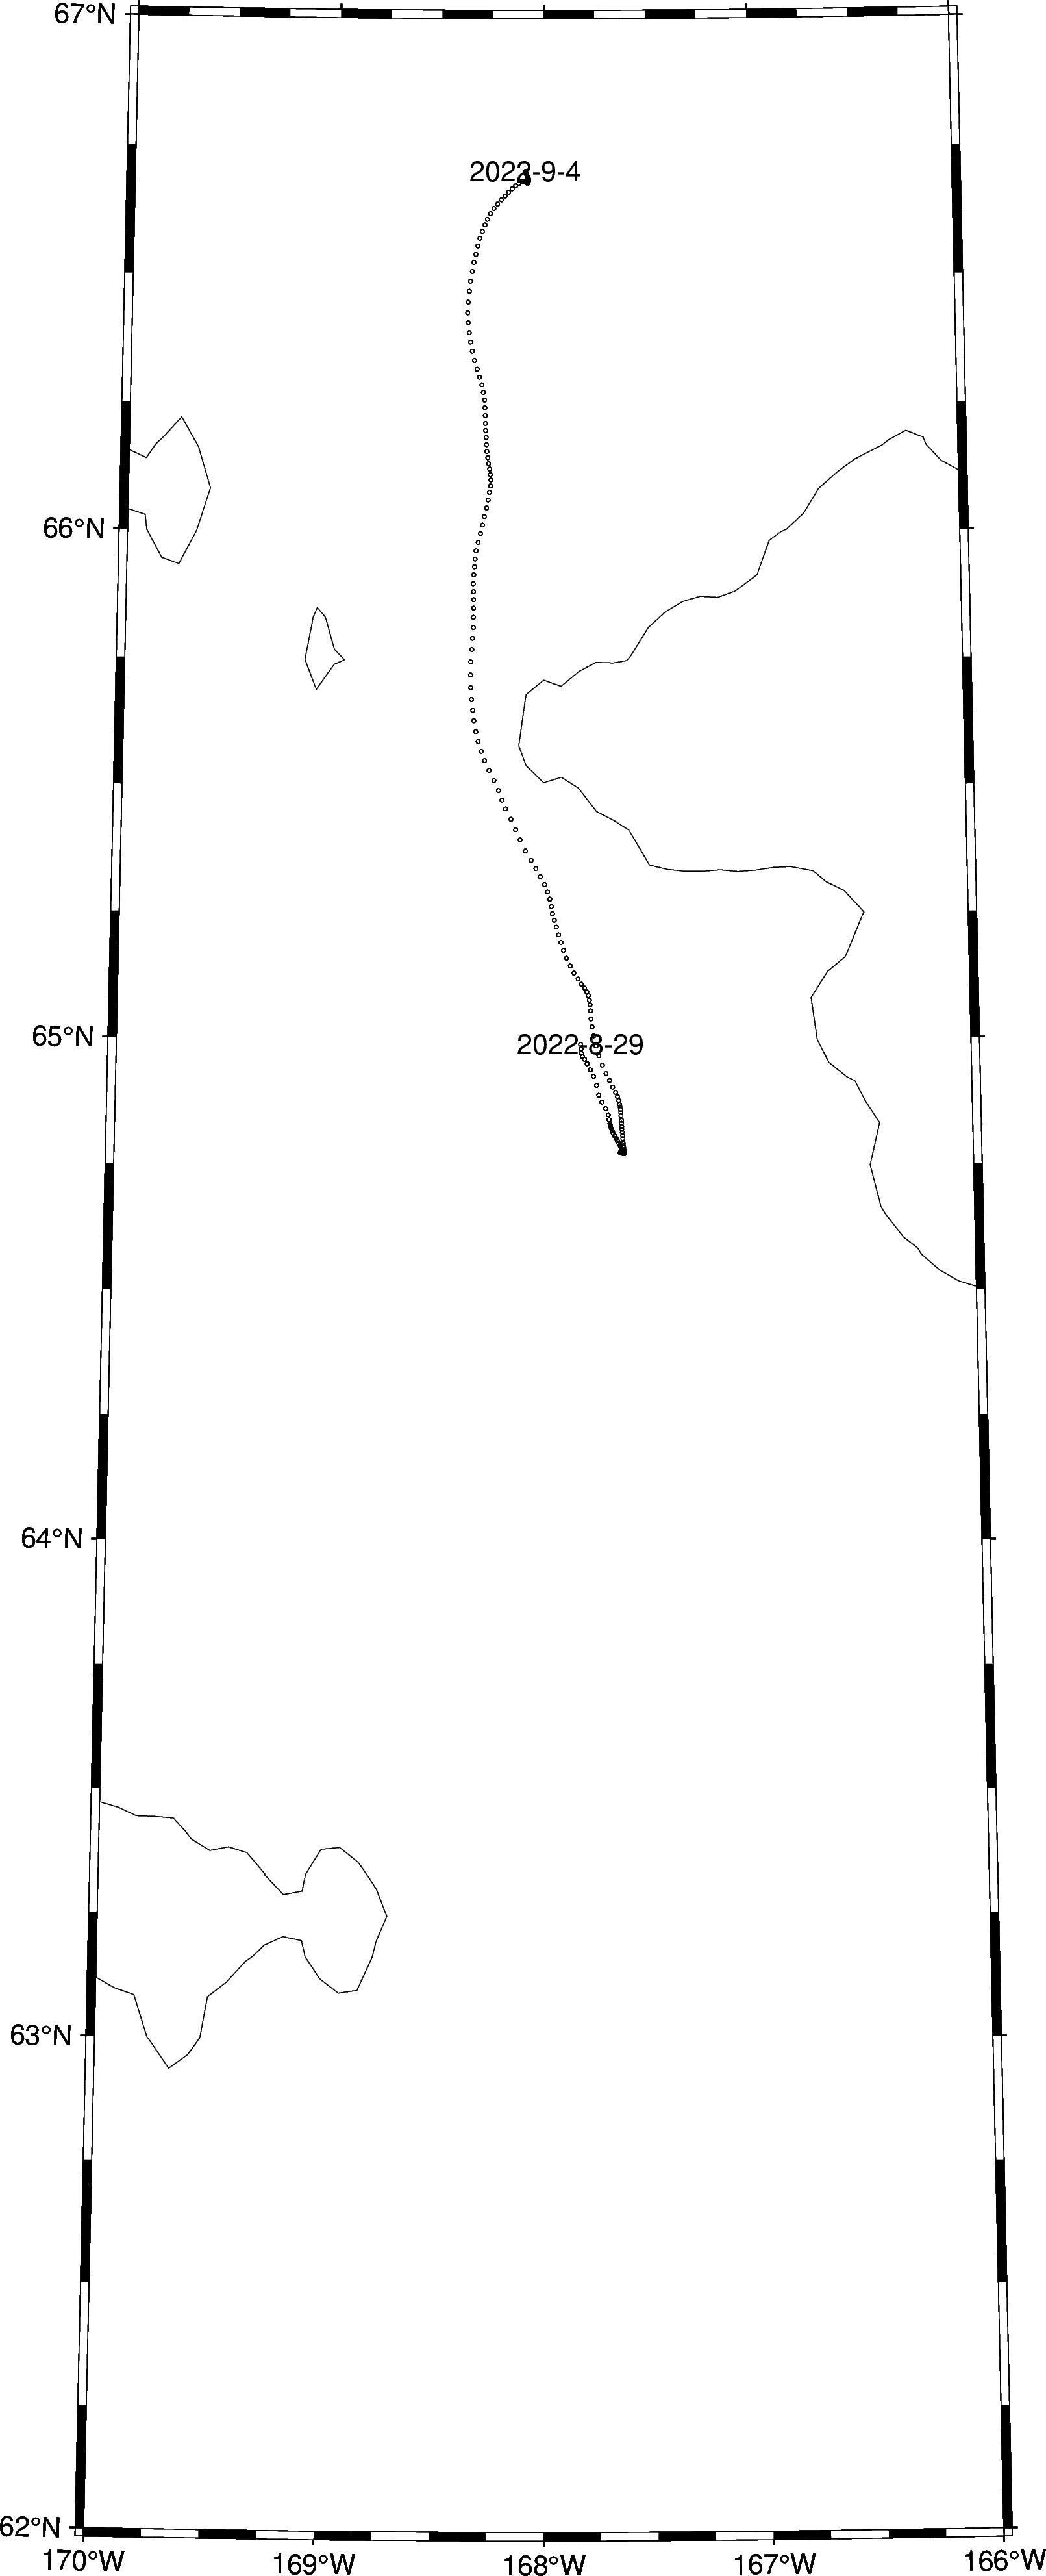

grdcontour [WARNING]: No contours found


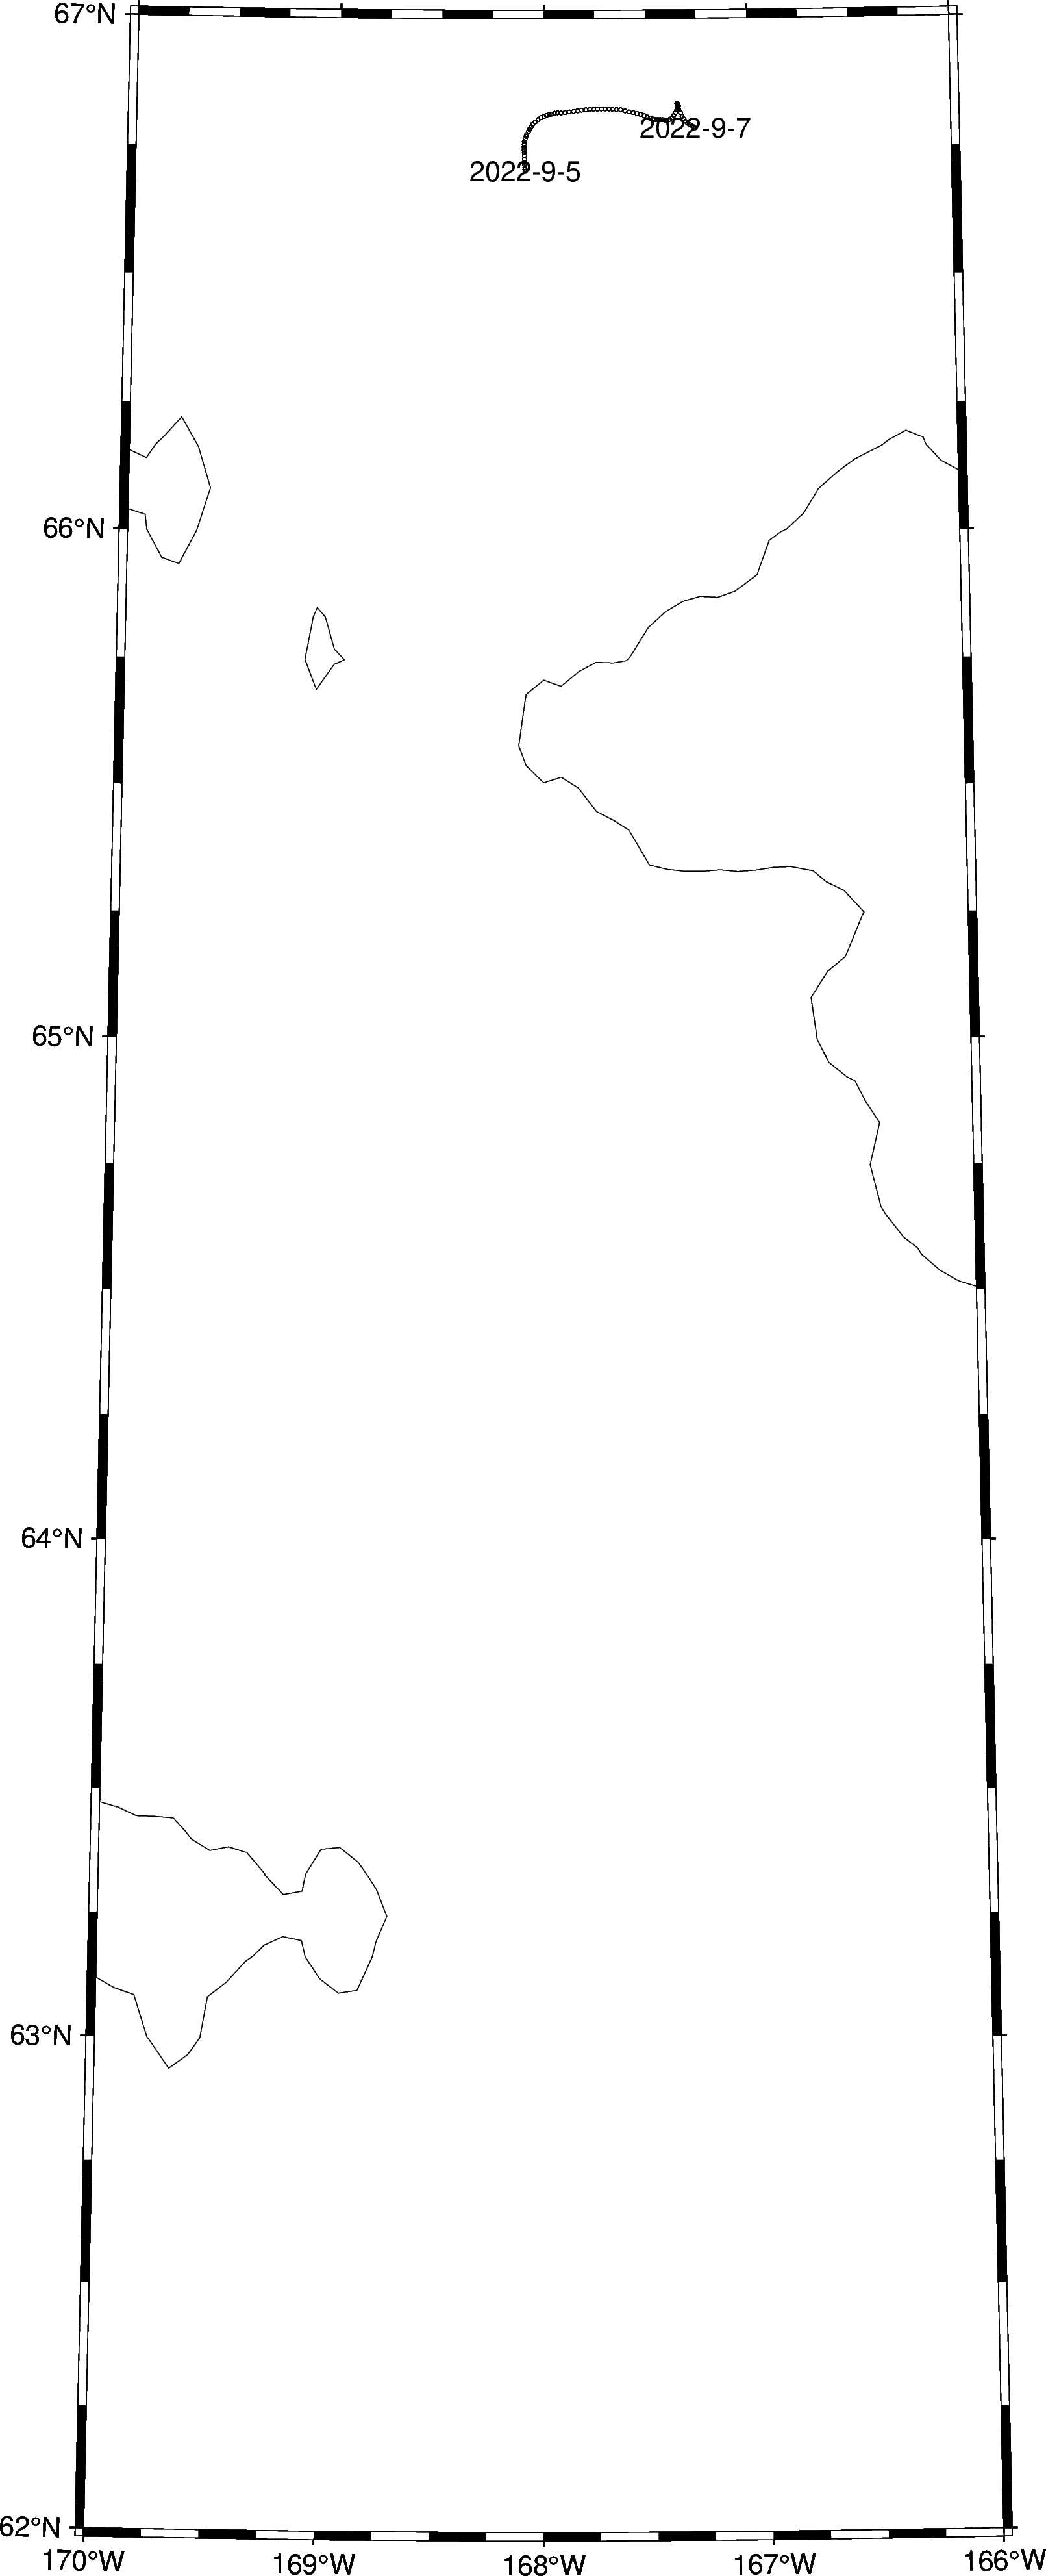

In [9]:
for _g,gweek in sfc_pdf.groupby(sfc_pdf.index.isocalendar().week):
    fig = pygmt.Figure()
    #fixed interval grids with a secondary color for a isobath of interest
    # in this case countour 0,100,200...1500 in black and 70m in red and don't label anything
    fig.grdcontour(annotation=None,
                   levels=100,
                   grid=grid,
                   limit=[-1500, 0],
                   projection="L-168/35/33/45/12c",
                   frame=True,)
    fig.grdcontour(annotation=None,
                   levels=70,
                   grid=grid,
                   limit=[-100, -1],
                   projection="L-168/35/33/45/12c",
                   pen="red",
                   frame=True,)
    fig.plot(x=gweek.longitude, y=gweek.latitude, style="c0.05c", pen="black")
    fig.text(x=gweek.longitude.iloc[0], y=gweek.latitude.iloc[0], 
             text=f'{gweek.index[0].year}-{gweek.index[0].month}-{gweek.index[0].day}')
    fig.text(x=gweek.longitude.iloc[-1], y=gweek.latitude.iloc[-1], 
             text=f'{gweek.index[-1].year}-{gweek.index[-1].month}-{gweek.index[-1].day}')
    fig.show()
    fig.savefig(f'{gweek.index[0].year}-{gweek.index[0].month}-{gweek.index[0].day}.png')

In [8]:
gweek.index[0].year

2022